In [9]:
## Find Peaks in Sun Spot Data and get Periodicity

Read in the data

import pandas


In [10]:
import pandas as pd
sunspot_data_file = "./data/Sunspots.csv"
sunspot_data = pd.read_csv(sunspot_data_file)

### Examine the Data

In [11]:
sunspot_data.head()
#type(sunspot_data)

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


Wow that is some old data.  This dataset goes back 300 years!
Let's make a plot first and see the data

In [12]:
import matplotlib.pyplot as plt
sunspot_data['Date'] = pd.to_datetime(sunspot_data['Date'], format='%Y-%m-%d')
sunspots = "Monthly Mean Total Sunspot Number"
sunspot_data.describe()

,Unnamed: 0,Monthly Mean Total Sunspot Number
count,3235.000000,3235.000000
mean,1617.000000,82.481082
std,934.008387,67.805190
min,0.000000,0.000000
25%,808.500000,24.750000
50%,1617.000000,68.300000
75%,2425.500000,122.900000
max,3234.000000,398.200000


<Axes: xlabel='Date'>

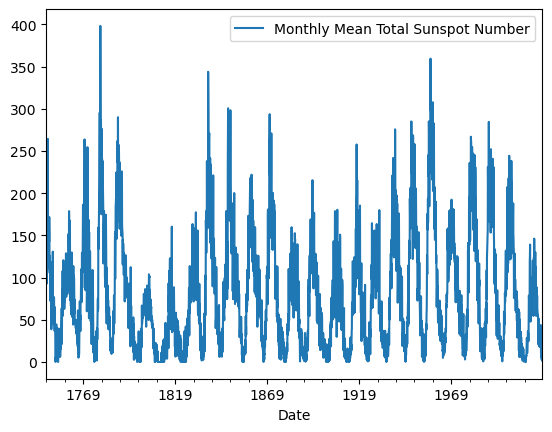

In [13]:
sunspot_data.plot("Date", sunspots)

Now Lets find the peaks.
We see that we want to find the peak WITHIN a window.


<Axes: xlabel='Date'>

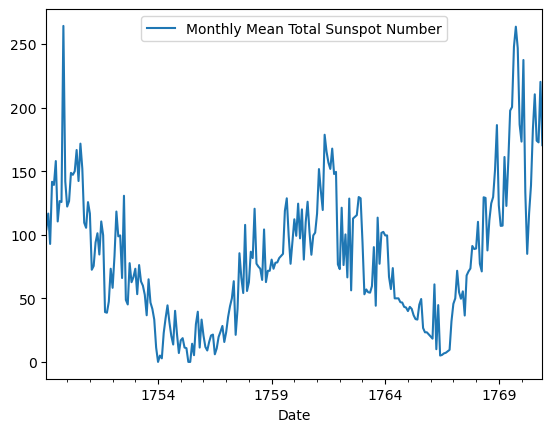

In [14]:
sunspot_data.iloc[1:12*22, :].plot("Date", sunspots)

We want to find a window size of ~ 8 years


In [15]:

from scipy.signal import find_peaks
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.
peaks, _ = find_peaks(sunspot_data.loc[:, sunspots], height=100, distance=12*8)
peaks[:10]


array([  10,  148,  249,  352,  467,  669,  818,  953, 1055, 1185])

OK this gives up the index of the peaks.  Now lets plot it

<Figure size 2400x1200 with 0 Axes>

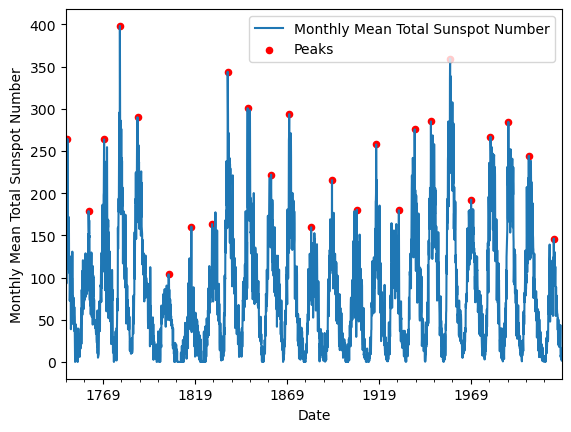

In [16]:
fig =  plt.figure(figsize=(16, 8), dpi=150)

ax = sunspot_data.plot("Date", sunspots, )
sunspot_data.iloc[peaks, :].plot.scatter("Date", sunspots, label="Peaks", color="red", ax=ax)
plt.legend()

Wow That is really nice!
Now lets get the mean spacing

In [17]:
peak_time = sunspot_data.loc[peaks, "Date"]
# Get Time Dif
# https://www.codeforests.com/2020/10/04/calculate-date-difference-between-rows/
peak_time.diff()


10           NaT
148    4200 days
249    3075 days
352    3134 days
467    3501 days
669    6148 days
818    4534 days
953    4109 days
1055   3106 days
1185   3956 days
1338   4657 days
1456   3591 days
1599   4352 days
1735   4141 days
1897   4928 days
2023   3837 days
2171   4505 days
2274   3134 days
2380   3226 days
2505   3806 days
2642   4169 days
2768   3835 days
2885   3561 days
3018   4049 days
3181   4960 days
Name: Date, dtype: timedelta64[ns]

Lets get this histogram of this

(array([5, 3, 4, 5, 3, 1, 2, 0, 0, 1]), array([ 8.4478022 ,  9.29203297, 10.13626374, 10.98049451, 11.82472527,
       12.66895604, 13.51318681, 14.35741758, 15.20164835, 16.04587912,
       16.89010989]))


(array([5., 3., 4., 5., 3., 1., 2., 0., 0., 1.]),
 array([ 8.4478022 ,  9.29203297, 10.13626374, 10.98049451, 11.82472527,
        12.66895604, 13.51318681, 14.35741758, 15.20164835, 16.04587912,
        16.89010989]),
 <BarContainer object of 10 artists>)

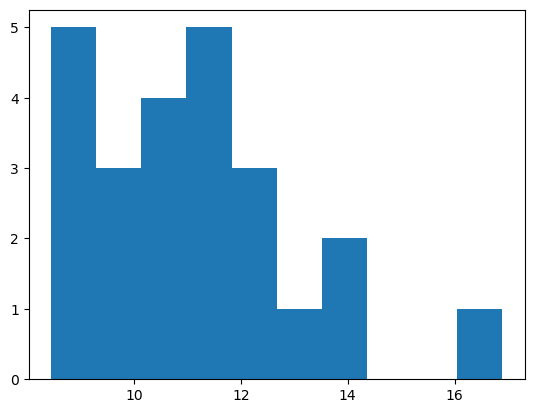

In [20]:
import numpy as np
peak_years = peak_time.diff().astype('int64')/(60*60*24*364)/1e9
histogram = np.histogram(peak_years[1:], bins=10)
print(histogram)
plt.hist(peak_years[1:], bins=10)

## References

Sunspot data is from DeepLearningAI.